In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from datetime import datetime
import os

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
basedir = '/content/gdrive/MyDrive/ColabNotebooks/00_Data/'
logdir = f'{basedir}ProjektStudium/logs/Sine_TimeSeries/' + datetime.now().strftime("%Y%m%d-%H%M%S")
os.makedirs(logdir)

In [53]:
it = 0

# Data

In [4]:
X_train = np.arange(0,100,0.5) 
y_train = np.sin(X_train)

X_test = np.arange(100,200,0.5) 
y_test = np.sin(X_test)

n_features = 1

train_series = y_train.reshape((len(y_train), n_features))
test_series  = y_test.reshape((len(y_test), n_features))

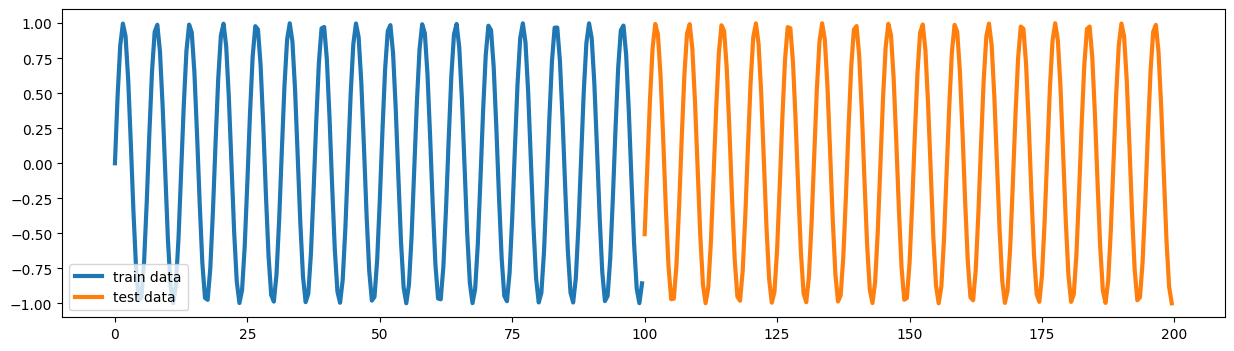

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(X_train,y_train, lw=3, label='train data')
ax.plot(X_test, y_test,  lw=3, label='test data')
ax.legend(loc="lower left")
plt.show();

## Time Series

In [49]:
# Params
timesteps  = 20 #window size
batches = 10

In [50]:
from keras.preprocessing.sequence import TimeseriesGenerator



train_generator = TimeseriesGenerator(train_series, train_series,
                                      length        = timesteps, 
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = batches)

test_generator = TimeseriesGenerator(test_series, test_series,
                                      length        = timesteps, 
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = batches)

# Model

In [52]:
n_neurons = 4
eps = 300

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(n_neurons, input_shape=(timesteps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'accuracy'])

hist = model.fit(train_generator,epochs=eps)

# Predict

In [55]:
test_predictions  = model.predict(test_generator)

18/18 [==============================] - 1s 5ms/step


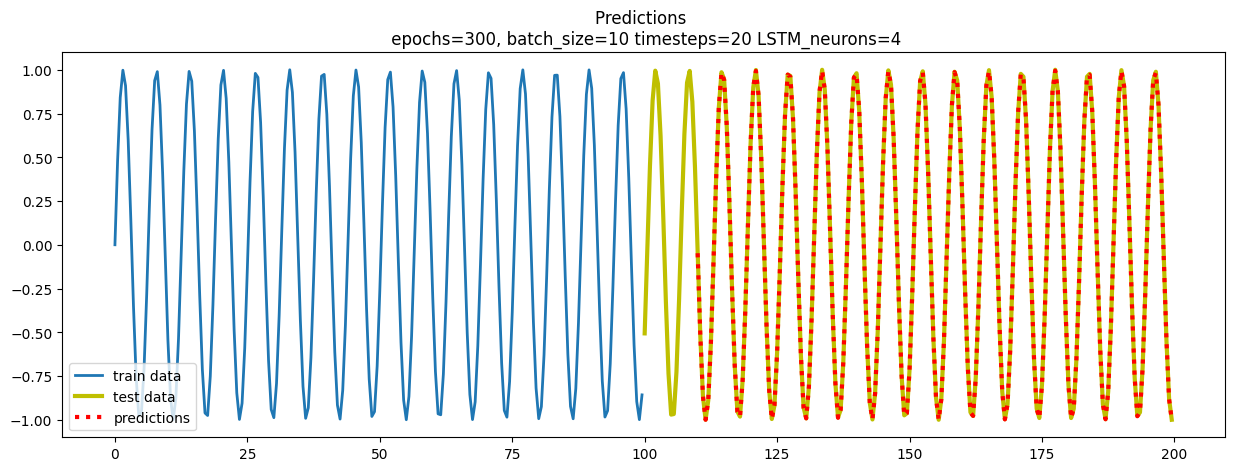

In [56]:
x = np.arange(110,200,0.5)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(X_train,y_train, lw=2, label='train data')
ax.plot(X_test,y_test, lw=3, c='y', label='test data')
ax.plot(x,test_predictions, lw=3, c='r',linestyle = ':', label='predictions')
ax.legend(loc="lower left")
plt.title(f'Predictions \n epochs={eps}, batch_size={batches} timesteps={timesteps} LSTM_neurons={n_neurons}')
plt.savefig(f'{logdir}/predictions_{it}.png')
plt.show();

## Plot Metrics


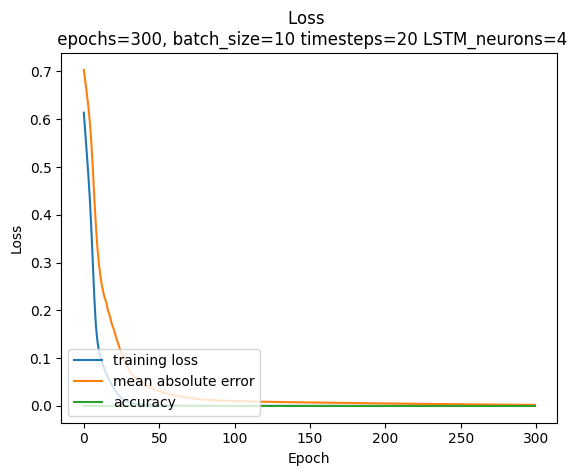

In [57]:
plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['mae'], label='mean absolute error')
plt.plot(hist.history['accuracy'], label='accuracy')
plt.title(f'Loss \n epochs={eps}, batch_size={batches} timesteps={timesteps} LSTM_neurons={n_neurons}')
plt.legend(loc='lower left')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig(f'{logdir}/metrics_{it}')
plt.show()

# Noise

In [74]:
X_train_noise = np.arange(0,50,0.5) 
y_train_noise = np.sin(X_train_noise) + np.sin(3*X_train_noise)/3 + np.sin(5*X_train_noise)/5 + np.sin(10*X_train_noise)/10

X_test_noise  = np.arange(50,100,0.5) 
y_test_noise  = np.sin(X_train_noise) + np.sin(3*X_train_noise)/3 + np.sin(5*X_train_noise)/5 +  np.sin(10*X_train_noise)/10

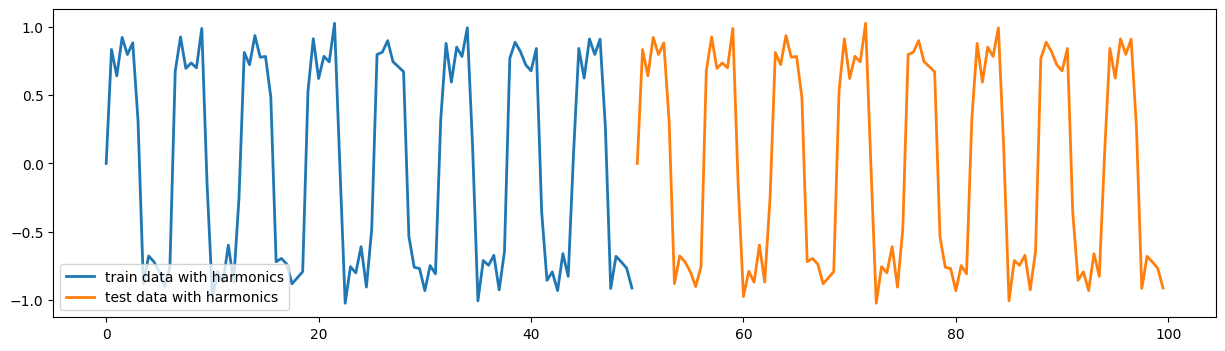

In [75]:
train_series_noise = y_train_noise.reshape((len(y_train_noise), n_features))
test_series_noise  = y_test_noise.reshape((len(y_test_noise), n_features))
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(X_train_noise,y_train_noise, lw=2, label='train data with harmonics')
ax.plot(X_test_noise, y_test_noise,  lw=2, label='test data with harmonics')
ax.legend(loc="lower left")
plt.show();

In [76]:
train_generator_noise = TimeseriesGenerator(train_series_noise, train_series_noise,
                                      length        = timesteps, 
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = batches)

test_generator_noise = TimeseriesGenerator(test_series_noise, test_series_noise,
                                      length        = timesteps, 
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = batches)

In [ ]:
hist_noise = model.fit(train_generator_noise, epochs=eps)

In [78]:
test_predictions_noise  = model.predict(test_generator_noise)

8/8 [==============================] - 0s 4ms/step


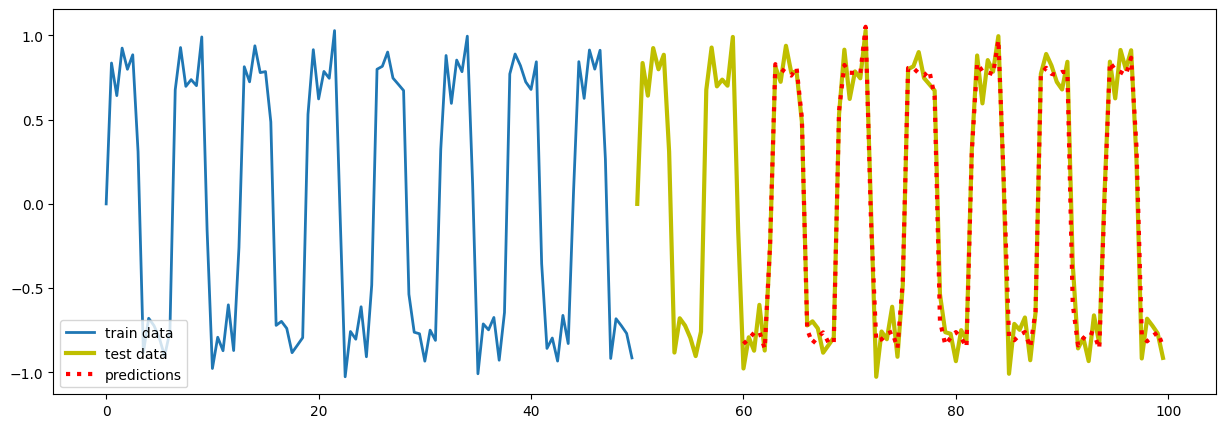

In [81]:
x = np.arange(60,100,0.5)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(X_train_noise,y_train_noise, lw=2, label='train data')
ax.plot(X_test_noise,y_test_noise, lw=3, c='y', label='test data')
ax.plot(x,test_predictions_noise, lw=3, c='r',linestyle = ':', label='predictions')
ax.legend(loc="lower left")
plt.savefig(f'{logdir}/noisy_predictions_{it}')
plt.show();